# Tracking bird migration

In [11]:
import pandas as pd 
import cartopy.crs as ccrs 
import cartopy.feature as cfeature 
import matplotlib.pyplot as plt 

In [12]:
birddata = pd.read_csv("bird_tracking.csv") 
bird_names = pd.unique(birddata.bird_name) 

In [13]:
birddata.tail(10)

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
61910,-158,2014-04-30 20:14:32+00,833,-57.479803,51.353159,3.176386,3.403836,Sanne
61911,8,2014-04-30 20:29:56+00,833,17.675638,51.352518,3.177163,0.419762,Sanne
61912,40,2014-04-30 20:44:56+00,833,102.044737,51.352512,3.177327,9.026300,Sanne
61913,4,2014-04-30 20:59:52+00,833,23.649017,51.352580,3.177224,1.478005,Sanne
61914,-10,2014-04-30 21:29:45+00,833,-10.057916,51.352661,3.177122,5.531148,Sanne
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne
61919,9,2014-04-30 23:59:34+00,833,149.949008,51.354474,3.181057,0.485489,Sanne


In [8]:
birddata.head(10)

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric
5,54,2013-08-15 02:47:38+00,851,-46.344478,49.420375,2.120840,2.904772,Eric
6,57,2013-08-15 03:02:33+00,851,-56.369922,49.420352,2.120901,3.080584,Eric
7,65,2013-08-15 03:17:27+00,851,-79.170227,49.420342,2.120809,2.199659,Eric
8,59,2013-08-15 03:32:35+00,851,-57.682428,49.420319,2.120860,2.640076,Eric
9,107,2013-08-15 03:47:48+00,851,119.604739,49.420286,2.121301,4.592211,Eric


In [3]:
# To move forward, we need to specify a  
# specific projection that we're interested  
# in using. 
proj = ccrs.Mercator()  

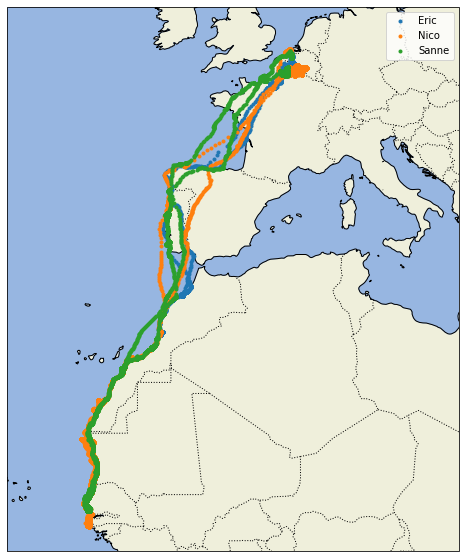

In [10]:
plt.figure(figsize=(10,10)) 

ax = plt.axes(projection=proj) 
ax.set_extent((-25.0, 20.0, 52.0, 10.0)) 
ax.add_feature(cfeature.LAND) 
ax.add_feature(cfeature.OCEAN) 
ax.add_feature(cfeature.COASTLINE) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 

for name in bird_names: 
    ix = birddata['bird_name'] == name 
    x,y = birddata.longitude[ix], birddata.latitude[ix] 
    ax.plot(x,y,'.', transform=ccrs.Geodetic(), label=name) 
    
plt.legend(loc="upper right" ) 
plt.show() 